# Notebook tarea 2 VisInfo.
## Óscar Anuar Alvarado Morán

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

1.- Encontrar el valor atípico y explicar por qué se considera un valor extraño.

De acuerdo a los datos que se tienen en la diapositiva 4 de la presentación de introducción a la visualización se piensa que el valor atípico es el primer valor de tiempo cuando se tiene un procesador debido a la gran diferencia que se muestra respecto a los demás. No necesariamente significa que esté mal sino que respecto a los demás datos muestra un comportamiento no usual.

2.- Crear un archivo de esos datos en el formato CSV y leerlo en un Dataframe de Pandas.

In [3]:
datos = pd.read_csv("Procesadores.csv")
datos.columns = 'Procesadores Tiempo'.split()
datos

,Procesadores,Tiempo
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


3.- Completar las columnas de Speeup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con p' = 16. Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [4]:
datos["Aceleración"] = datos.Tiempo[0]/datos.Tiempo
datos["Eficiencia"] = datos.Aceleración/datos.Procesadores
datos["Costo"] = datos.Procesadores * datos.Tiempo
datos

,Procesadores,Tiempo,Aceleración,Eficiencia,Costo
0,1,29278,1.000000,1.000000,29278
1,16,178,164.483146,10.280197,2848
2,25,78,375.358974,15.014359,1950
3,64,16,1829.875000,28.591797,1024
4,256,2,14639.000000,57.183594,512
5,400,1,29278.000000,73.195000,400


In [5]:
datos["Aceleración_p"] = datos.Tiempo[1]/datos.Tiempo
datos["Eficiencia_p"] = datos.Procesadores[1] * datos.Aceleración_p/datos.Procesadores
datos["Max_acel_rel"] = datos.Procesadores * datos.Procesadores[1]

In [6]:
datos

,Procesadores,Tiempo,Aceleración,Eficiencia,Costo,Aceleración_p,Eficiencia_p,Max_acel_rel
0,1,29278,1.000000,1.000000,29278,0.006080,0.097274,16
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,256
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,400
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,1024
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,4096
5,400,1,29278.000000,73.195000,400,178.000000,7.120000,6400


In [7]:
def graficar(dataframe, lin = True):
    color1 = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    color2 = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    plt.plot(dataframe[dataframe.columns[0]], dataframe[dataframe.columns[1]], marker = 'o', color = color1, linewidth = 2, markersize = 8)
    plt.grid(color='k', linestyle='-', linewidth=0.5, alpha = 0.3)
    plt.xlabel(f'{dataframe.columns[0]}')
    plt.ylabel(f'{dataframe.columns[1]}')
    
    lineal = np.linspace(min(dataframe[dataframe.columns[0]]),max(dataframe[dataframe.columns[0]]))
    if lin == True:
        plt.plot(lineal, lineal, linewidth = 2, color = color2)
        parche_2 = mpatches.Patch(color = color2, label='Lineal')
    else:
        plt.plot(lineal, np.ones(len(lineal)), linewidth = 2, color = color2)
        parche_2 = mpatches.Patch(color = color2, label='Máxima eficiencia')

    parche_datos = mpatches.Patch(color = color1, label='Datos')
    plt.legend(handles=[parche_datos, parche_2])
    
    plt.title(f'{dataframe.columns[1]} vs {dataframe.columns[0]}', fontdict = {'fontsize': 23})

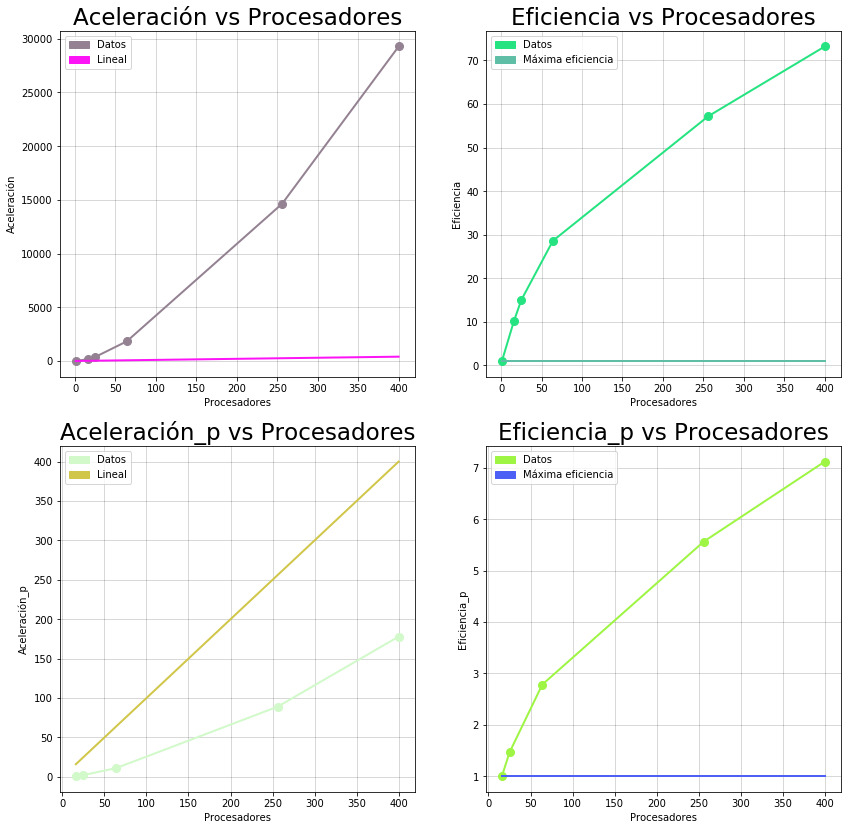

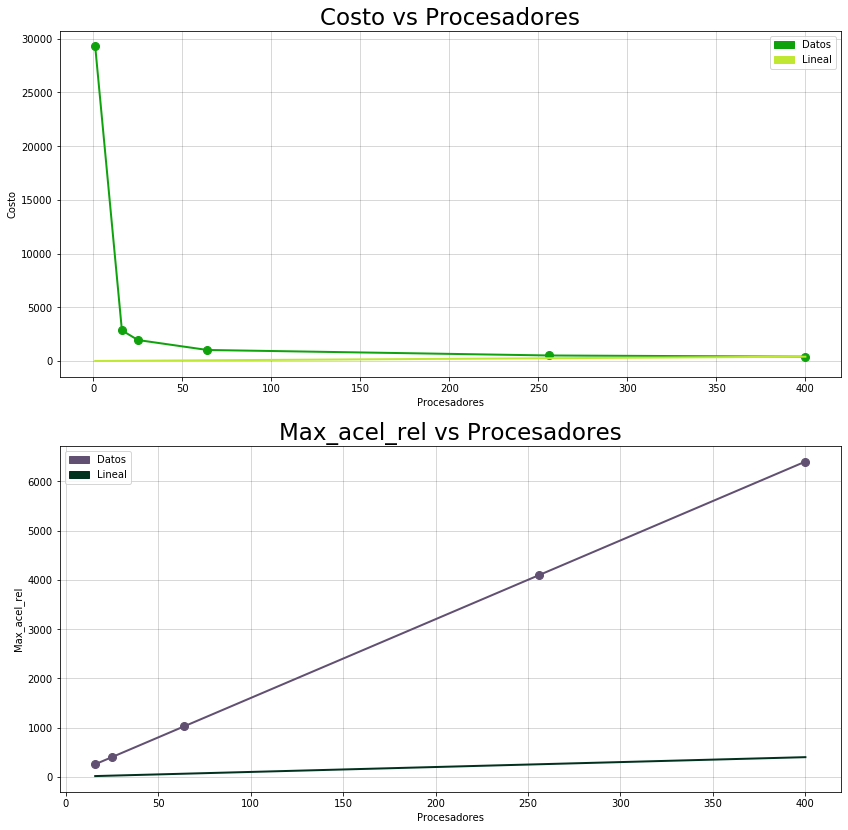

In [11]:
fig = plt.figure(figsize = (14,14))
ax1 = plt.subplot(221)
graficar(datos['Procesadores Aceleración'.split()])
#--------------------------------------------------------
ax2 = plt.subplot(222)
graficar(datos['Procesadores Eficiencia'.split()], lin = False)
#--------------------------------------------------------
ax3 = plt.subplot(223)
graficar(datos['Procesadores Aceleración_p'.split()].iloc[1:,:])
#--------------------------------------------------------
ax4 = plt.subplot(224)
graficar(datos['Procesadores Eficiencia_p'.split()].iloc[1:,:], lin = False)

#--------------------------------------------------------
fig = plt.figure(figsize = (14,14))
ax5 = plt.subplot(211)
graficar(datos['Procesadores Costo'.split()])
#--------------------------------------------------------
ax4 = plt.subplot(212)
graficar(datos['Procesadores Max_acel_rel'.split()].iloc[1:,:])

4.- Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la transparencia 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [13]:
datos['Tiempo_p'] = 430
datos.Tiempo_p.loc[1:] = datos.Tiempo.loc[1:]

In [14]:
datos["Aceleración_2"] = datos.Tiempo_p[0]/datos.Tiempo_p
datos["Eficiencia_2"] = datos.Aceleración_2/datos.Procesadores
datos

,Procesadores,Tiempo,Aceleración,Eficiencia,Costo,Aceleración_p,Eficiencia_p,Max_acel_rel,Tiempo_p,Aceleración_2,Eficiencia_2
0,1,29278,1.000000,1.000000,29278,0.006080,0.097274,16,430,1.000000,1.000000
1,16,178,164.483146,10.280197,2848,1.000000,1.000000,256,178,2.415730,0.150983
2,25,78,375.358974,15.014359,1950,2.282051,1.460513,400,78,5.512821,0.220513
3,64,16,1829.875000,28.591797,1024,11.125000,2.781250,1024,16,26.875000,0.419922
4,256,2,14639.000000,57.183594,512,89.000000,5.562500,4096,2,215.000000,0.839844
5,400,1,29278.000000,73.195000,400,178.000000,7.120000,6400,1,430.000000,1.075000


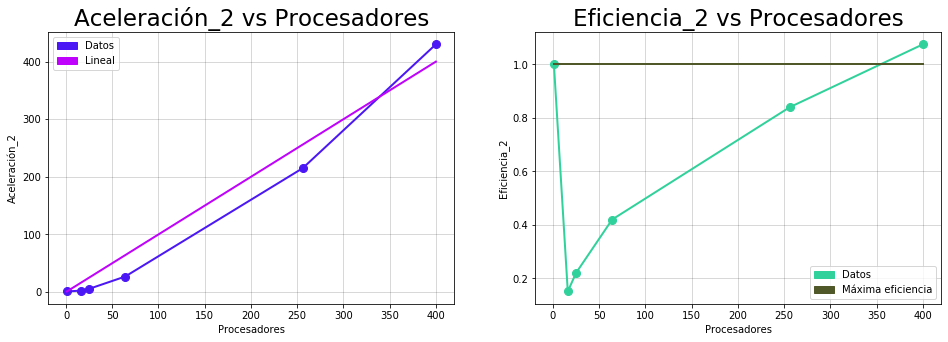

In [15]:
fig = plt.figure(figsize = (16,5))
ax7 = plt.subplot(121)
graficar(datos['Procesadores Aceleración_2'.split()])
#--------------------------------------------------------
ax8 = plt.subplot(122)
graficar(datos['Procesadores Eficiencia_2'.split()], lin = False)

5.- Contar la historia del análisis de esta información usando gráficos que resalten lo realizado en los incisos 2 y 3.

No sé si en verdad se refiera a los incisos 2 y 3 ya que el 2 sólo es cargar el Dataframe, así que me imagino que se refiere a los incisos 3 y 4. La historia que podemos contar de esto es que al graficar datos pudimos observar valores atípicos que en el dataframe puedan pasar desapercibidos, ya sea por la poca experiencia del observador o simplemente por la desimportancia que se puede dar al analizar datos.